In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
df_ped=pd.read_csv('Fixations\WithRecordingTime\gaze_dispersion_peds.csv')
df_ped =df_ped.dropna()
df_cyc=pd.read_csv('Fixations\WithRecordingTime\gaze_dispersion_cyc.csv')
df_cyc =df_cyc.dropna()

In [9]:
grouped_gaze_dispersion_ped = df_ped.groupby(['participant no', 'way', 'alert']).size().reset_index(name='Euclidean Distance')
grouped_gaze_dispersion_ped

grouped_gaze_dispersion_cyc = df_cyc.groupby(['participant no', 'way', 'alert']).size().reset_index(name='Euclidean Distance')
grouped_gaze_dispersion_cyc

,participant no,way,alert,Euclidean Distance
0,c10,approach,Baseline,305
1,c10,approach,Bell,292
2,c10,approach,Continuous,287
3,c10,approach,Flash Light,288
4,c10,approach,Voice,308
...,...,...,...,...
75,c8,overtake,Baseline,295
76,c8,overtake,Bell,241
77,c8,overtake,Continuous,278
78,c8,overtake,Flash Light,314


In [10]:
grouped_gaze_dispersion_ped['alert'].unique()

array(['Baseline', 'Bell', 'Continuous ', 'Flash Light', 'Voice'],
      dtype=object)

In [11]:
grouped_gaze_dispersion_cyc['alert'].unique()

array(['Baseline', 'Bell', 'Continuous ', 'Flash Light', 'Voice'],
      dtype=object)

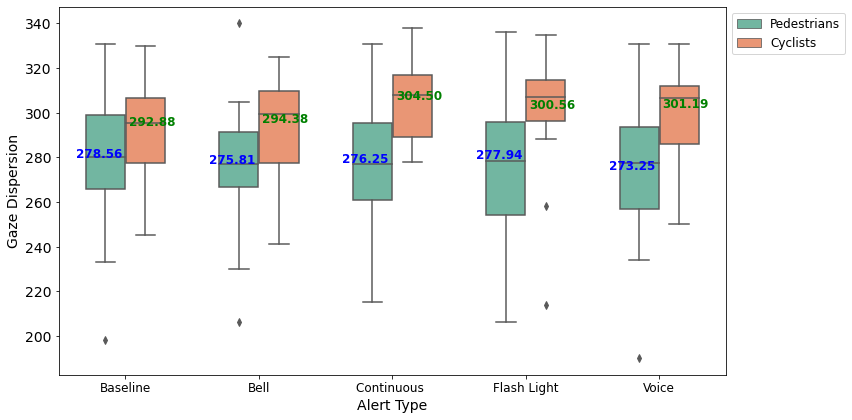

In [14]:
plt.rcParams.update({
    'font.size': 12,      # Set font size for all text
    'font.family': 'sans-serif',  # Change the font family (e.g., 'serif', 'sans-serif', etc.)
    'axes.titlesize': 16,    # Font size for title
    'axes.labelsize': 14,    # Font size for x and y labels
    'xtick.labelsize': 12,   # Font size for x ticks
    'ytick.labelsize': 14,   # Font size for y ticks
    'legend.fontsize': 12    # Font size for the legend
})


# Add a new column to differentiate between pedestrian and cyclist fixations
grouped_gaze_dispersion_ped['group'] = 'Pedestrians'
grouped_gaze_dispersion_cyc['group'] = 'Cyclists'

# Combine both dataframes
df_combined = pd.concat([grouped_gaze_dispersion_ped, grouped_gaze_dispersion_cyc])

# Create the boxplot with hue for differentiating pedestrians and cyclists
plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(x='alert', y='Euclidean Distance', hue='group', data=df_combined, palette="Set2", width=0.6)

# Calculate means for pedestrians and cyclists separately
mean_values = df_combined.groupby(['alert', 'group'])['Euclidean Distance'].mean().reset_index()

# Add mean values for both groups as text annotations on the plot
for i, row in mean_values.iterrows():
    x = list(df_combined['alert'].unique()).index(row['alert']) + (-0.2 if row['group'] == 'Pedestrians' else 0.2)
    plt.text(x, row['Euclidean Distance'], f'{row["Euclidean Distance"]:.2f}', color='blue' if row['group'] == 'Pedestrians' else 'green',
             ha="center", va="bottom", fontweight='bold')


# Set plot title and labels
#plt.title('Number of Fixations Across Alert Types - Pedestrians and Cyclists')
plt.xlabel('Alert Type')
plt.ylabel('Gaze Dispersion')

# Adjust legend placement
plt.legend( bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
